# Investigating Enron Dataset
## Machine Learning Course from Udacity Data Analyst Nanodegree

This is the final project for the machine learning course. Enron financial data and email data will be investigated to find the list of person of interest (POI) who was involved in the fraud activities.

Below is the order of the investigation process I will employ for this final project.
- Univariate analysis to process the dataset (taking care of missing values and outliers)
- Bivariate analysis to find features that can be dimensionally reduced through PCA
- Try a variety of classfiers

First, necessary Libraries will be loaded.

In [19]:
#!/usr/bin/python

import sys
import pickle
import pprint
import matplotlib.pyplot as plt
import numpy as np

### Setting the path
sys.path.append("../tools/")

### These are the scripts given in the class
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

Load the dictionary containing the dataset.

In [20]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [21]:
len(data_dict)

146

There are total 146 number of data in data_dict. I am going to print out the first two of the data from data_dict to see how the dictionary looks like.

In [22]:
stop = 0
for k, v in data_dict.iteritems():
    print k
    pprint.pprint(v)
    if stop == 1:
        break
    stop += 1

METTS MARK
{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}
BAXTER JOHN C
{'bonus': 1200000,
 'deferral_payments': 1295738,
 'deferred_income': -1386055,
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 6680544,
 'expenses': 11200,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 1586055,
 'other': 2660303,
 'poi': False,
 'restricted_stock': 3942714,
 'rest

The keys of data_dict are the names of people and the values are various features. Every feature except poi and email_address are numerical values. It looks like it is either a number of 'NaN' when the data is missing. And poi is a boolean value that I can use to find POI's.

In [23]:
### Finding the number of features
for k,v in data_dict.iteritems():
    print "The number of features:", len(v)
    features_list = v.keys() # features are saved separately for later use
    break

The number of features: 21


There are total 21 features in the dataset. I will ignore "email_address" because they are not numerical values. And I will ingore 'other' as well because I don't know what this is.

In [24]:
### Removing poi and email_address
try:
    features_list.remove("email_address")
    features_list.remove("other")
except:
    pass

### Convert data_dict into numpy array
data = featureFormat(data_dict, features_list)
print "The type of data:", type(data)
print "The total number of data", data.shape

The type of data: <type 'numpy.ndarray'>
The total number of data (145L, 19L)


Now the data_dict is converted to numpy array. And it contains 145 rows and 19 columns. 
featureFormat ignores the "NaN" values and creates numpy array that I can use it for the analysis more easily.

Using data numpy array I will check the number of poi's and non-poi's.

In [25]:
### Finding the index of poi
poi_ind = features_list.index("poi")

### Print out the number of poi and non-poi
print "The total number of poi:", np.sum(data[:,poi_ind])
print "The total number of non-poi:", np.size(data[:,poi_ind]) - np.sum(data[:,poi_ind])

The total number of poi: 18.0
The total number of non-poi: 127.0


There are total 18 POI and 127 non-POI.

## Plotting

From now on, I will start drawing various plots for univariate analysis and bivariate analysis.
I will draw histograms for each feature first.

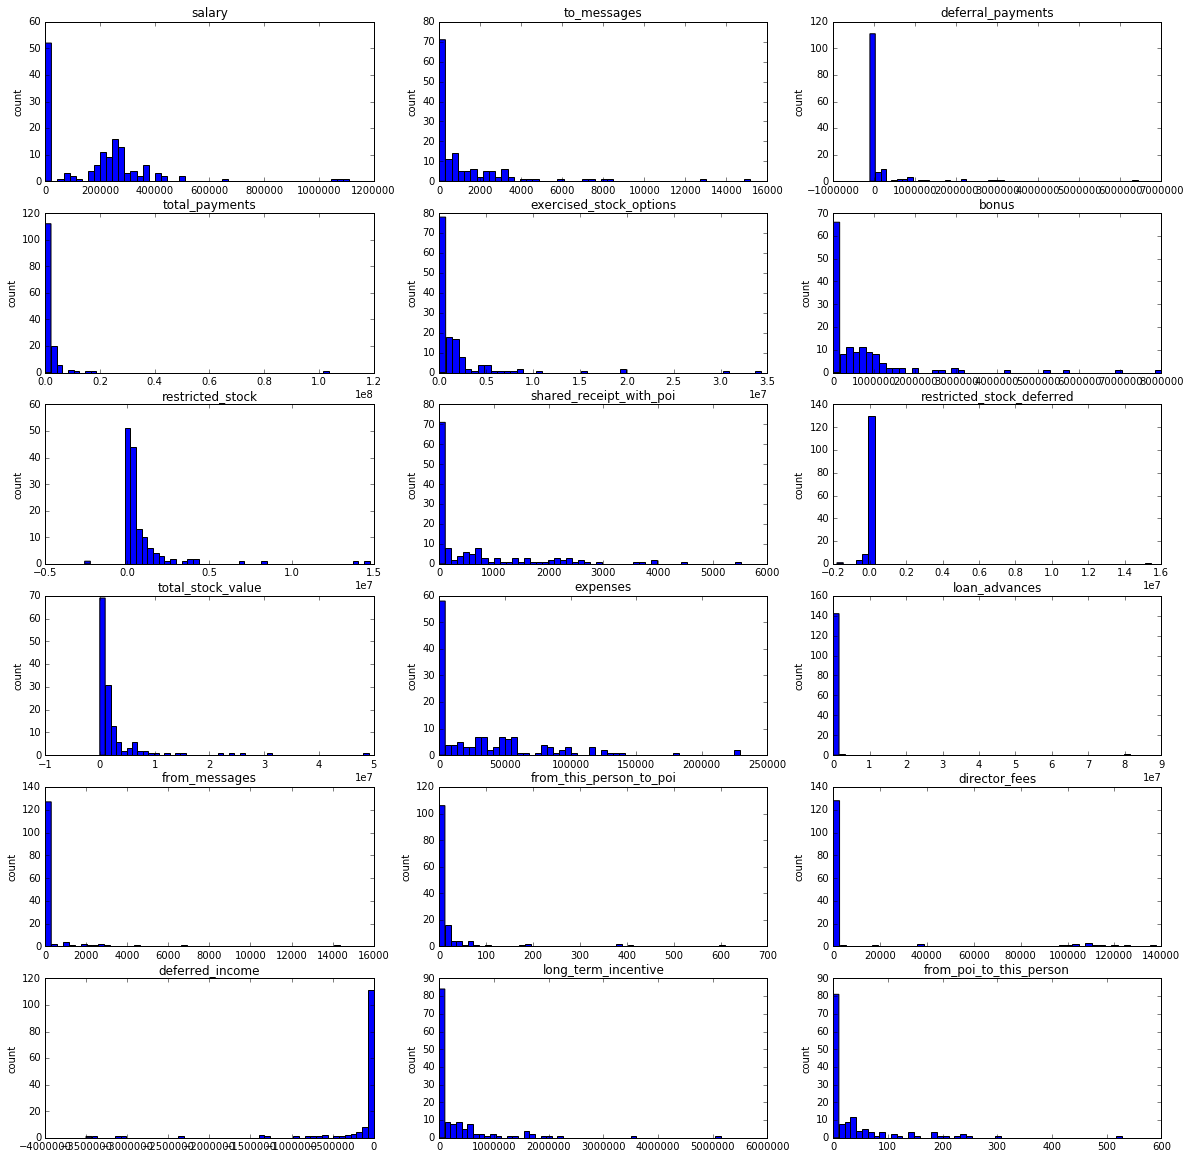

In [34]:
### Create new features list without poi
features_list_new = [ii for ii in features_list if ii != "poi"]

%matplotlib inline
### 20 histograms for features
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(6, 3)

### the histogram of the data
### x: x coordinate values, y: y coordinate values
### r: row index, c: column index
### title: title of a subplot
def subplot_histogram(x, bins, r, c, title):
    axarr[r, c].hist(x, bins = bins)
    axarr[r, c].set_title(title)
    axarr[r, c].set_ylabel("count")

for i in range(len(features_list_new)):
    subplot_histogram(data[:,i],50,i/3,i%3,features_list_new[i])

plt.show()

Above diagrams show 19 histograms. I first created new list of features excluding poi because array of poi consists of only true or false so it won't provide an insightful histogram. 

Looking at these histograms, I can see there are outliers for every feature.

I will look into salary more deeply and see if there is any interesting thing going on.

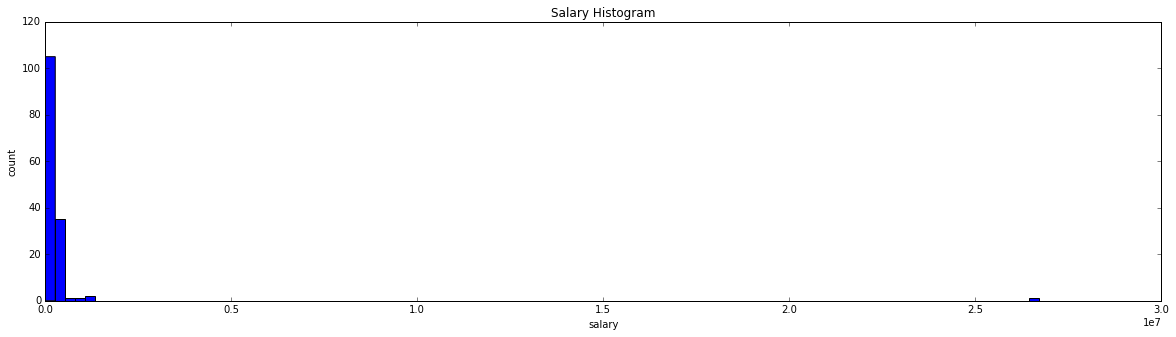

In [27]:
%matplotlib inline
### Find indices for salary
salary_ind = features_list.index("salary")

### Set the size of the plot
plt.rcParams["figure.figsize"] = (20,5)

### Draw Salary histogram
plt.hist(data[:,salary_ind], bins=100)
plt.xlabel("salary")
plt.ylabel("count")
plt.title("Salary Histogram")
plt.show()

Now I will get rid of the outlier above 2.5e7 and replot the histogram

53408458.0 is the total sum of salaries
26704229.0 is removed


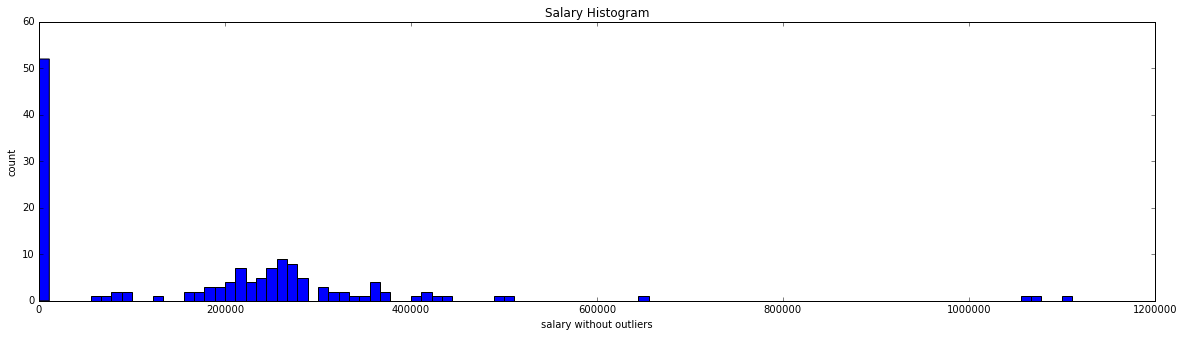

In [28]:
### Total sum of salaries
import numpy as np
print np.sum(data[:,salary_ind]), "is the total sum of salaries"

### Create new array that contains salar values without outliers
salary_no_outliers = []
for i in data[:,salary_ind]:
    if i < 2.5e7:
        salary_no_outliers.append(i)
    else:
        print i, "is removed"

### Draw Salary histogram
plt.hist(salary_no_outliers, bins=100)
plt.xlabel("salary without outliers")
plt.ylabel("count")
plt.title("Salary Histogram")
plt.show()

The outlier removed is half of the total sum of salary array, which means someone added a total sum of salaries into the data. I believe that in data_dict there is a key that contains the sum of every feature.

In [29]:
for k,v in data_dict.iteritems():
    if v["salary"] == 26704229.0:
        print k,v

TOTAL {'salary': 26704229, 'to_messages': 'NaN', 'deferral_payments': 32083396, 'total_payments': 309886585, 'exercised_stock_options': 311764000, 'bonus': 97343619, 'restricted_stock': 130322299, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': -7576788, 'total_stock_value': 434509511, 'expenses': 5235198, 'loan_advances': 83925000, 'from_messages': 'NaN', 'other': 42667589, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees': 1398517, 'deferred_income': -27992891, 'long_term_incentive': 48521928, 'email_address': 'NaN', 'from_poi_to_this_person': 'NaN'}


As I expected one of the keys in data_dict is TOTAL. I will create a new dictionary that excludes this key.

In [30]:
### New data_dict excluding TOTAL key
data_dict_new = {}

for k, v in data_dict.iteritems():
    if k != "TOTAL":
        data_dict_new[k] = v

### Print out the new data_dict length
print "The length of the new data_dict:", len(data_dict_new)
    

The length of the new data_dict: 145


Now there are 145 data in the data_dict_new. I will graph the histograms again.

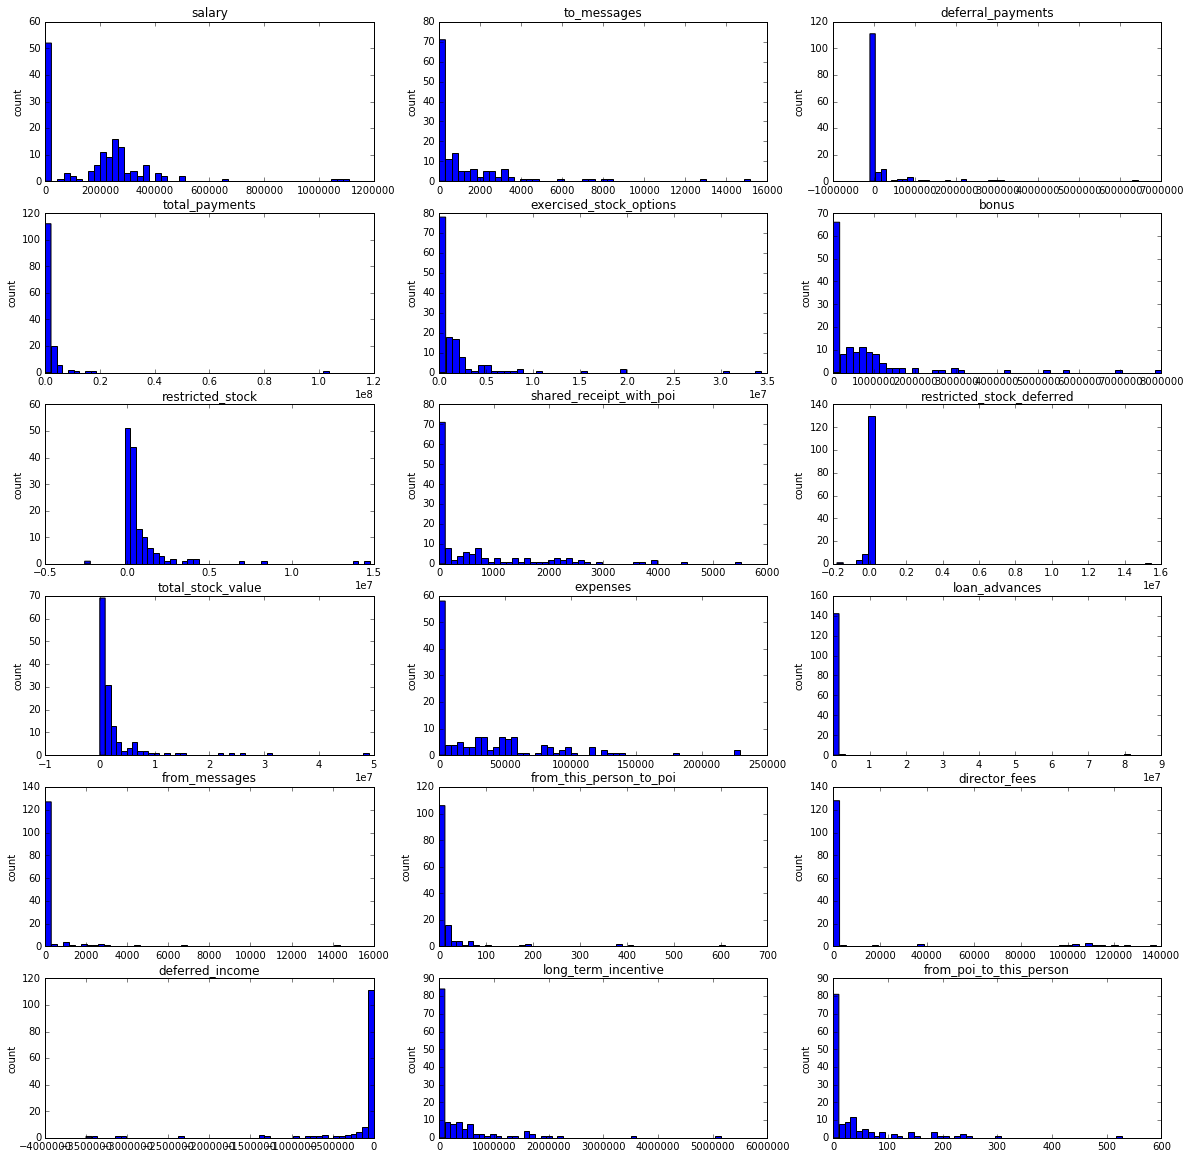

In [33]:
### Convert data_dict_new into numpy array
data = featureFormat(data_dict_new, features_list_new)

%matplotlib inline
### 20 histograms for features
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(6, 3)

### the histogram of the data
### x: x coordinate values, y: y coordinate values
### r: row index, c: column index
### title: title of a subplot
def subplot_histogram(x, bins, r, c, title):
    axarr[r, c].hist(x, bins = bins)
    axarr[r, c].set_title(title)
    axarr[r, c].set_ylabel("count")

for i in range(len(features_list_new)):
    subplot_histogram(data[:,i],50,i/3,i%3,features_list_new[i])

plt.show()

The histograms are much better than before. Although there are still outliers in histograms, getting rid of them might not be a good idea because those values may be helpful identifying POI's.

## Bivariate Analysis

I will first check the relationship between salary and bonus by graphing a scatter plot.

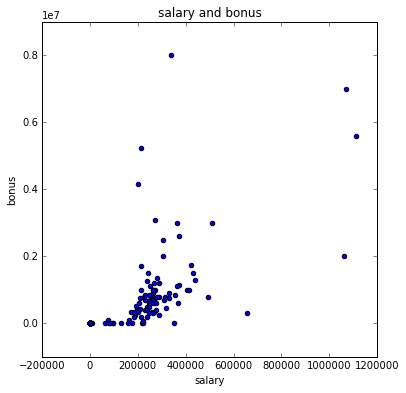

In [35]:
%matplotlib inline
### Find indices for bonus
bonus_ind = features_list.index("bonus")

### Set the size of the plot
plt.rcParams["figure.figsize"] = (6,6)

### Draw Salary histogram
plt.scatter(data[:,salary_ind], data[:,bonus_ind])
plt.xlabel("salary")
plt.ylabel("bonus")
plt.title("salary and bonus")
plt.show()